In [32]:
from sklearn.datasets import make_classification
import numpy as np
x,y = make_classification(n_samples=100
                          ,n_features=2,
                          n_classes=2,
                          n_informative=2,
                          n_redundant=0,
                          n_clusters_per_class=1,
                          hypercube=False,
                          class_sep=10,
                          random_state=24
                          ) 

In [33]:
import matplotlib.pyplot as plt

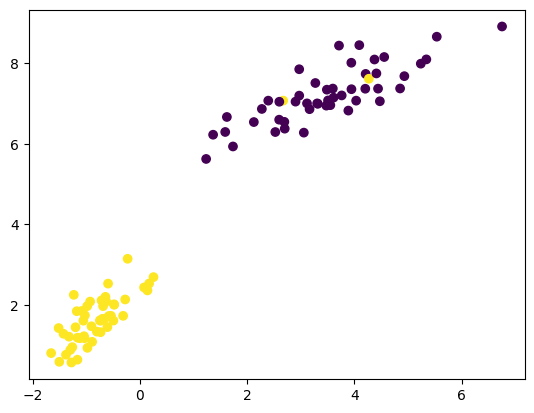

In [34]:
plt.scatter(x[:,0],x[:,1],c=y)

In [35]:
def sigmoid(n):
    return 1/(1+np.exp(-1*n))

In [36]:
def GD(x,y):
    x=np.insert(x,0,1,axis=1)
    weights= np.ones(x.shape[1])
    lr =0.01
    epoch =100000

    for j in range(epoch):
        y_hat = sigmoid(np.dot(x,weights))
        weights = weights + lr *( np.dot((y-y_hat),x)/x.shape[0])

    return weights[0],weights[1:]

In [37]:
W0, coeff_=GD(x,y)

In [38]:
m = -(coeff_[0]/coeff_[1])
b = -(W0/coeff_[1])

In [39]:
x_new = np.linspace(x[:,0].min(),x[:,0].max())
y_new=m* x_new +b

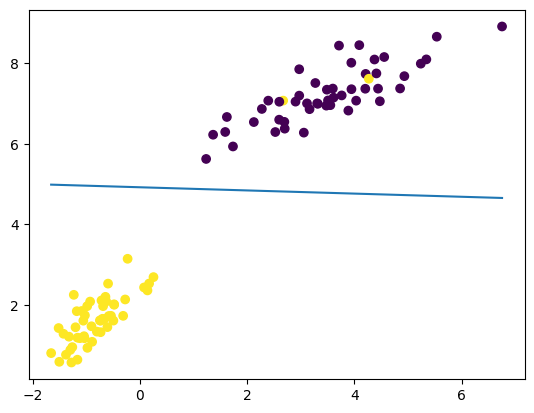

In [40]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(x_new,y_new)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression()

In [43]:
lr.fit(x,y)

LogisticRegression()

In [44]:
lr.coef_,lr.intercept_

(array([[-0.17989515, -1.30809341]]), array([6.70306083]))

In [45]:
lr.coef_[0]

array([-0.17989515, -1.30809341])

In [46]:
m = -(lr.coef_[0][0]/lr.coef_[0][1])
b = -(lr.intercept_/lr.coef_[0][1])

In [47]:
y_new_2=m* x_new +b

<Figure size 800x600 with 0 Axes>

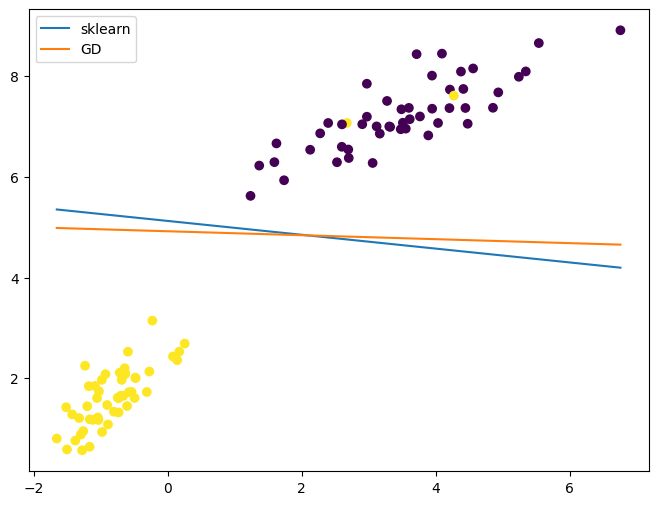

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(x_new,y_new_2,label='sklearn')
plt.plot(x_new,y_new,label='GD')
plt.legend()

plt.show()